In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import warnings

warnings.filterwarnings("ignore")


In [12]:
# class EyeDiseaseDataset(Dataset):
#     def __init__(self, dataframe, transform=None):
#         self.dataframe = dataframe
#         self.transform = transform

#     def __len__(self):
#         return len(self.dataframe)

#     def __getitem__(self, idx):
#         img_path = self.dataframe.iloc[idx, 0]
#         image = Image.open(img_path).convert('RGB')
#         label = self.dataframe.iloc[idx, 1]

#         if self.transform:
#             image = self.transform(image)

#         return image, label

In [13]:
# data_dir = '/content/drive/My Drive/Colab Notebooks/eye_dataset/train'

In [14]:
# def dataPaths(data_dir):
#     filepaths = []
#     labels = []
#     folds = os.listdir(data_dir)
#     for fold in folds:
#         foldPath = os.path.join(data_dir, fold)
#         filelist = os.listdir(foldPath)
#         for file in filelist:
#             fpath = os.path.join(foldPath, file)
#             filepaths.append(fpath)
#             labels.append(fold)
#     return filepaths, labels

# def dataFrame(files, labels):
#     Fseries = pd.Series(files, name='filepaths')
#     Lseries = pd.Series(labels, name='labels')
#     return pd.concat([Fseries, Lseries], axis=1)

# def split_(data_dir):
#     files, labels = dataPaths(data_dir)
#     df = dataFrame(files, labels)
#     strat = df['labels']
#     trainData, dummyData = train_test_split(df, train_size=0.8, shuffle=True, random_state=42, stratify=strat)
#     strat = dummyData['labels']
#     validData, testData = train_test_split(dummyData, train_size=0.5, shuffle=True, random_state=42, stratify=strat)
#     return trainData, validData, testData

In [15]:
class EyeDiseaseDataset:
    def __init__(self, data_dir):
        self.data_dir = data_dir

    def data_paths(self):
        filepaths = []
        labels = []
        folds = os.listdir(self.data_dir)
        for fold in folds:
            fold_path = os.path.join(self.data_dir, fold)
            filelist = os.listdir(fold_path)
            for file in filelist:
                fpath = os.path.join(fold_path, file)
                filepaths.append(fpath)
                labels.append(fold)
        return filepaths, labels

    def data_frame(self, files, labels):
        fseries = pd.Series(files, name='filepaths')
        lseries = pd.Series(labels, name='labels')
        return pd.concat([fseries, lseries], axis=1)

    def split_(self):
        files, labels = self.data_paths()
        df = self.data_frame(files, labels)
        strat = df['labels']
        train_data, dummy_data = train_test_split(df, train_size=0.8, shuffle=True, random_state=42, stratify=strat)
        strat = dummy_data['labels']
        valid_data, test_data = train_test_split(dummy_data, train_size=0.5, shuffle=True, random_state=42, stratify=strat)
        return train_data, valid_data, test_data

In [16]:
data_dir = 'eye_dataset(no_separate)'

In [18]:
data_split = EyeDiseaseDataset(data_dir)
train_data, valid_data, test_data = data_split.split_()

NotADirectoryError: [Errno 20] Not a directory: 'eye_dataset(no_separate)/.DS_Store'

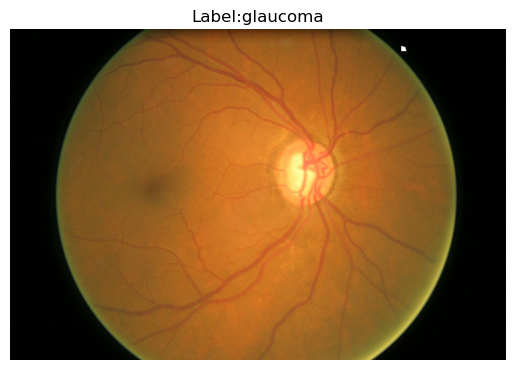

In [ ]:
def display_random_image(df):
    random_row = df.sample(1).iloc[0]
    filepath = random_row['filepaths']
    label = random_row['labels']

    img = Image.open(filepath)
    plt.imshow(img)
    plt.title(f'Label:{label}')
    plt.axis('off')
    plt.show()

display_random_image(train_data)

In [ ]:
# class EyeDiseaseDatasetPyTorch(Dataset):
#     def __init__(self, dataframe, transform=None):
#         self.dataframe = dataframe
#         self.transform = transform

#     def __len__(self):
#         return len(self.dataframe)

#     def __getitem__(self, idx):
#         img_path = self.dataframe.iloc[idx, 0]
#         image = Image.open(img_path).convert('RGB')
#         label = self.dataframe.iloc[idx, 1]

#         if self.transform:
#             image = self.transform(image)

#         label = torch.tensor(int(label))  # Convert label to tensor

#         return image, label

class EyeDiseaseDatasetPyTorch(Dataset):
    def __init__(self, dataframe, label_map, transform=None):
    # def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.label_map = label_map
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        image = Image.open(img_path).convert('RGB')
        label = self.dataframe.iloc[idx, 1]
        label = self.label_map[label]  # Convert label to integer index

        if self.transform:
            image = self.transform(image)

        return image, label






In [ ]:
# Create a label map
unique_labels = train_data['labels'].unique()
label_map = {label: idx for idx, label in enumerate(unique_labels)}

# Print the label map to verify
print(label_map)

{'glaucoma': 0, 'diabetic_retinopathy': 1, 'normal': 2, 'cataract': 3}


In [ ]:
# img_size = (256, 256)
# batch_size = 16

In [ ]:


# train_transform = transforms.Compose([
#     transforms.Resize(img_size),
#     transforms.RandomRotation(30),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomVerticalFlip(),
#     transforms.ColorJitter(brightness=0.5, contrast=0.5),
#     transforms.ToTensor()
# ])

# valid_test_transform = transforms.Compose([
#     transforms.Resize(img_size),
#     transforms.ToTensor()
# ])



In [ ]:
# train_dataset = EyeDiseaseDatasetPyTorch(train_data, transform=train_transform)
# valid_dataset = EyeDiseaseDatasetPyTorch(valid_data, transform=valid_test_transform)
# test_dataset = EyeDiseaseDatasetPyTorch(test_data, transform=valid_test_transform)

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
def augment_data(train_df, valid_df, test_df, label_map, batch_size=16):
# def augment_data(train_df, valid_df, test_df, batch_size=16):
    img_size = (256, 256)

    train_transform = transforms.Compose([
        transforms.Resize(img_size),
        transforms.RandomRotation(30),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ColorJitter(brightness=0.5, contrast=0.5),
        transforms.ToTensor()
    ])

    valid_test_transform = transforms.Compose([
        transforms.Resize(img_size),
        transforms.ToTensor()
    ])

    train_dataset = EyeDiseaseDatasetPyTorch(train_df, label_map, transform=train_transform)
    valid_dataset = EyeDiseaseDatasetPyTorch(valid_df, label_map, transform=valid_test_transform)
    test_dataset = EyeDiseaseDatasetPyTorch(test_df, label_map, transform=valid_test_transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    print("Shape of augmented training images:", next(iter(train_loader))[0].shape)
    print("Shape of validation images:", next(iter(valid_loader))[0].shape)
    print("Shape of test images:", next(iter(test_loader))[0].shape)

    return train_loader, valid_loader, test_loader

In [ ]:
train_loader, valid_loader, test_loader = augment_data(train_data, valid_data, test_data, label_map)

Shape of augmented training images: torch.Size([16, 3, 256, 256])
Shape of validation images: torch.Size([16, 3, 256, 256])
Shape of test images: torch.Size([16, 3, 256, 256])


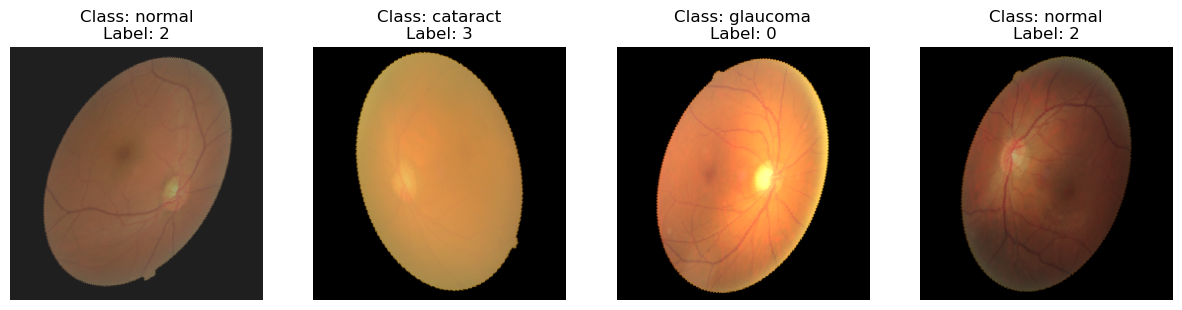

In [ ]:
# Assuming label_map is available
# label_map = {'class_name_1': 0, 'class_name_2': 1, ..., 'class_name_n': n-1}
reverse_label_map = {v: k for k, v in label_map.items()}

def show_images(loader, batch_size=16):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    images = images.numpy()

    fig, axes = plt.subplots(1, min(batch_size, 4), figsize=(15, 15))
    for idx in range(min(batch_size, 4)):
        ax = axes[idx]
        img = np.transpose(images[idx], (1, 2, 0)) * 255  # Scale images to [0, 255]
        img = img.astype(np.uint8)  # Convert to unsigned 8-bit integer type
        label_idx = labels[idx].item()
        class_name = reverse_label_map[label_idx]
        ax.imshow(img)
        ax.set_title(f'Class: {class_name}\nLabel: {label_idx}')
        ax.axis('off')
    plt.show()

show_images(train_loader)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f'Using device: {device}')  
class ResNet18(nn.Module):
    def __init__(self, num_classes):
        super(ResNet18, self).__init__()
        self.base_model = models.resnet18(pretrained=True)
        self.base_model.fc = nn.Linear(self.base_model.fc.in_features, num_classes)
        
        # Freeze all layers except the final fully connected layer
        for name, param in self.base_model.named_parameters():
            if "fc" in name:  # Unfreeze the final fully connected layer
                param.requires_grad = True
            else:
                param.requires_grad = False



    def forward(self, x):
        # Pass the input x through the base_model
        x = self.base_model(x)
        # y_pred is the output of the base_model
        y_pred = x
        return y_pred

    # def forward(self, x):
    #     # Perform a forward pass
    #     output = self.some_layer(x)
    #     # Optionally apply activation function
    #     output = F.relu(output)
    #     # Define y_pred as the output of your model
    #     y_pred = output
    #     return y_pred

Using device: cpu


In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0, restore_best_weights=True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_model = None
        self.best_loss = None
        self.counter = 0
        self.status = ""

    def __call__(self, model, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model = copy.deepcopy(model.state_dict())
        elif self.best_loss - val_loss >= self.min_delta:
            self.best_model = copy.deepcopy(model.state_dict())
            self.best_loss = val_loss
            self.counter = 0
            self.status = f"Improvement found, counter reset to {self.counter}"
        else:
            self.counter += 1
            self.status = f"No improvement in the last {self.counter} epochs"
            if self.counter >= self.patience:
                self.status = f"Early stopping triggered after {self.counter} epochs."
                if self.restore_best_weights:
                    model.load_state_dict(self.best_model)
                return True
        return False

In [ ]:
num_classes = len(train_data['labels'].unique())
model = ResNet18(num_classes).to(device)

# # Freeze all layers except the final classification layer
# for name, param in model.named_parameters():
#     if "fc" in name:  # Unfreeze the final classification layer
#         param.requires_grad = True
#     else:
#         param.requires_grad = False

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
es = EarlyStopping()

num_epochs = 50
history = {
    'train_loss': [],
    'val_loss': [],
    'train_acc': [],
    'val_acc': []
}

In [ ]:
# for epoch in range(num_epochs):
#     model.train()
#     train_loss = 0.0
#     for images, labels in train_loader:
#         images = images.to(device)
#         labels = labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()

#     print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss/len(train_loader)}")

#     model.eval()
#     valid_loss = 0.0
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for images, labels in valid_loader:
#             images = images.to(device)
#             labels = labels.to(device)
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             valid_loss += loss.item()
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#     accuracy = 100 * correct / total
#     print(f'Validation Loss: {valid_loss/len(valid_loader)}, Accuracy: {accuracy}%')


In [ ]:
# for epoch in range(num_epochs):
#     model.train()
#     train_loss = 0.0
#     correct_train = 0
#     total_train = 0

#     for images, labels in train_loader:
#         images = images.to(device)
#         labels = labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()

#         _, predicted = torch.max(outputs.data, 1)
#         total_train += labels.size(0)
#         correct_train += (predicted == labels).sum().item()

#     avg_train_loss = train_loss / len(train_loader)
#     train_accuracy = 100 * correct_train / total_train

#     train_losses.append(avg_train_loss)
#     train_accs.append(train_accuracy)

#     print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss}, Train Accuracy: {train_accuracy}%")

#     model.eval()
#     valid_loss = 0.0
#     correct_valid = 0
#     total_valid = 0

#     with torch.no_grad():
#         for images, labels in valid_loader:
#             images = images.to(device)
#             labels = labels.to(device)
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             valid_loss += loss.item()
#             _, predicted = torch.max(outputs.data, 1)
#             total_valid += labels.size(0)
#             correct_valid += (predicted == labels).sum().item()

#     avg_valid_loss = valid_loss / len(valid_loader)
#     val_accuracy = 100 * correct_valid / total_valid

#     val_losses.append(avg_valid_loss)
#     val_accs.append(val_accuracy)

#     print(f'Validation Loss: {avg_valid_loss}, Validation Accuracy: {val_accuracy}%')



In [ ]:
import copy
# Instantiate EarlyStopping
early_stopping = EarlyStopping(patience=5, min_delta=0, restore_best_weights=True)

history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    history['train_loss'].append(avg_train_loss)
    history['train_acc'].append(train_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss}, Train Accuracy: {train_accuracy}%")

    model.eval()
    valid_loss = 0.0
    correct_valid = 0
    total_valid = 0


    with torch.no_grad():
        for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_valid += labels.size(0).
            correct_valid += (predicted == labels).sum().item()

    avg_valid_loss = valid_loss / len(valid_loader)
    val_accuracy = 100 * correct_valid / total_valid

    history['val_loss'].append(avg_valid_loss)
    history['val_acc'].append(val_accuracy)

    print(f'Validation Loss: {avg_valid_loss}, Validation Accuracy: {val_accuracy}%')

    # Call early stopping
    if early_stopping(model, avg_valid_loss):
        print("Early stopping")
        break

Epoch 1/50, Train Loss: 1.3435378074645996, Train Accuracy: 35.824022346368714%
Validation Loss: 1.164848377307256, Validation Accuracy: 54.74860335195531%
Epoch 2/50, Train Loss: 1.1397342562675477, Train Accuracy: 54.25977653631285%
Validation Loss: 1.0150463730096817, Validation Accuracy: 60.33519553072626%
Epoch 3/50, Train Loss: 1.015016946527693, Train Accuracy: 63.687150837988824%
Validation Loss: 0.9287765671809515, Validation Accuracy: 68.71508379888269%
Epoch 4/50, Train Loss: 0.9449876103136274, Train Accuracy: 62.98882681564246%
Validation Loss: 0.8234628786643347, Validation Accuracy: 70.94972067039106%
Epoch 5/50, Train Loss: 0.8889450609683991, Train Accuracy: 67.8072625698324%
Validation Loss: 0.798081581791242, Validation Accuracy: 69.27374301675978%
Epoch 6/50, Train Loss: 0.8713275816705491, Train Accuracy: 66.68994413407822%
Validation Loss: 0.7476281126340231, Validation Accuracy: 72.06703910614524%
Epoch 7/50, Train Loss: 0.8245674365096622, Train Accuracy: 69.762

In [ ]:
print("History:", history)

History: {'train_loss': [1.3435378074645996, 1.1397342562675477, 1.015016946527693, 0.9449876103136274, 0.8889450609683991, 0.8713275816705491, 0.8245674365096622, 0.8120253172185686, 0.7990447329150305, 0.7812918914688958, 0.7842942522631751, 0.7423901091019313, 0.724573063188129, 0.7432179159588284, 0.7307897157139248, 0.7212954842382007, 0.7218371520439784, 0.709199897117085, 0.7097058256467184, 0.6952581170532438, 0.6897253963682387, 0.6868152668078741, 0.6751245227124956, 0.668263372613324, 0.6862339880731371, 0.6666295554902818, 0.655833414528105, 0.651154817475213, 0.6599826140536202, 0.6546953933106529, 0.6389991867873404, 0.6423628121614456, 0.6493595971001519, 0.641257127126058, 0.6352109478579627, 0.6255756593412823, 0.6410501148965624, 0.638050588965416, 0.628513115313318], 'train_acc': [35.824022346368714, 54.25977653631285, 63.687150837988824, 62.98882681564246, 67.8072625698324, 66.68994413407822, 69.76256983240224, 69.1340782122905, 69.48324022346368, 70.04189944134079,

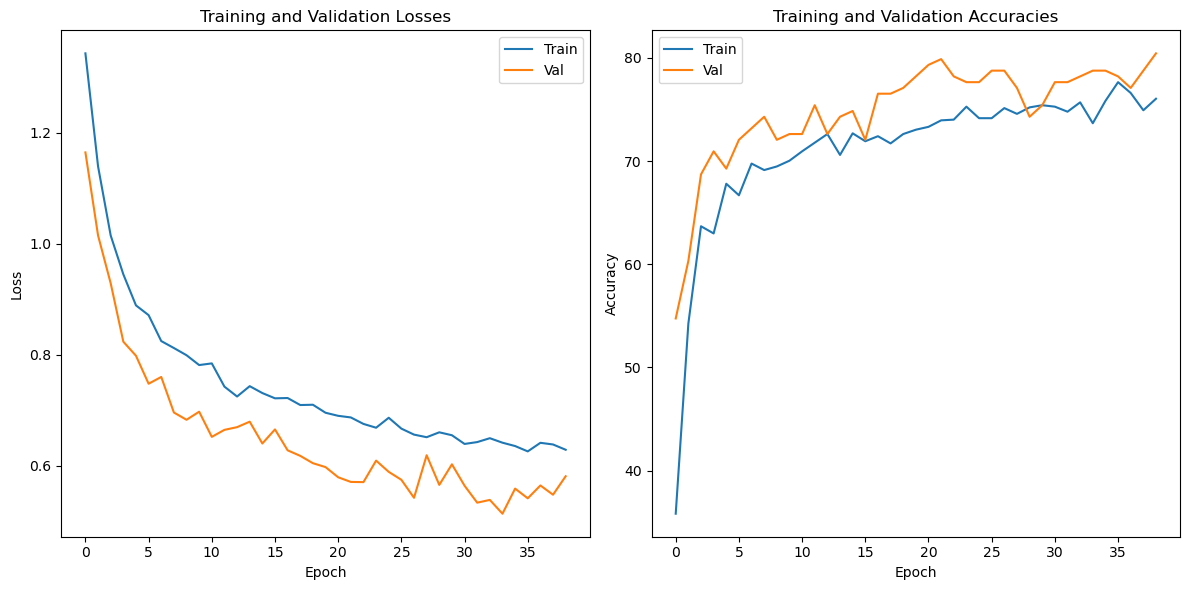

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses')

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train')
plt.plot(history['val_acc'], label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracies')

plt.tight_layout()
plt.show()

In [ ]:
# Save the model
torch.save(model.state_dict(), 'resnet18_model(v4).pth')

In [ ]:
import pickle

# Assume `model` is your trained PyTorch model
with open('ResNet18_model(v4).pkl', 'wb') as f:
    pickle.dump(model.state_dict(), f)

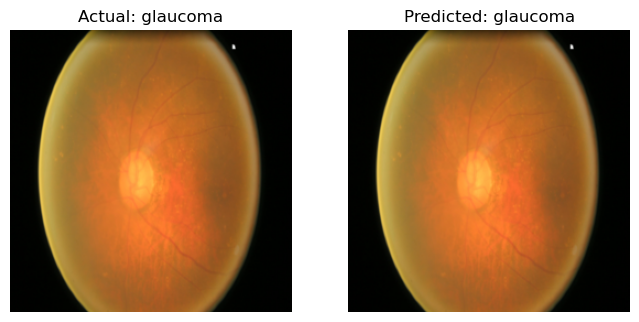

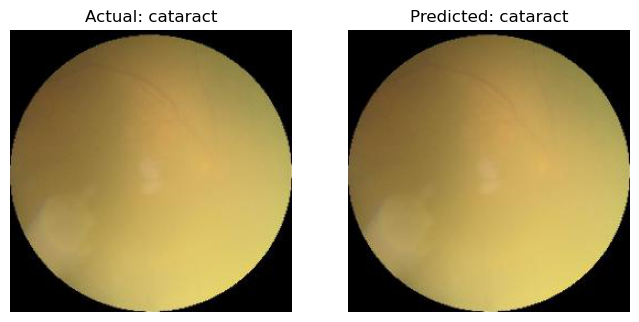

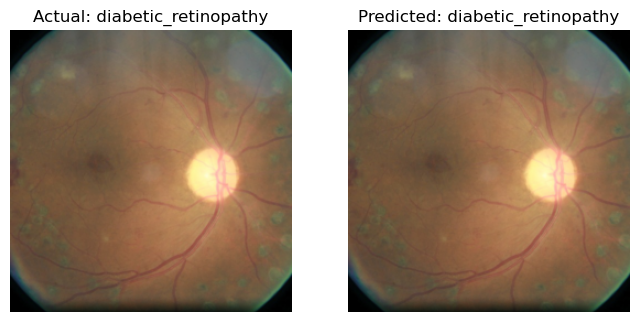

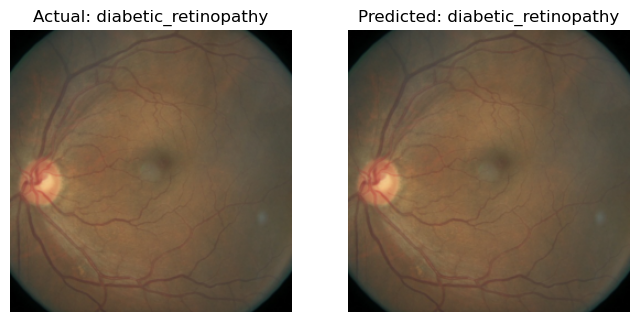

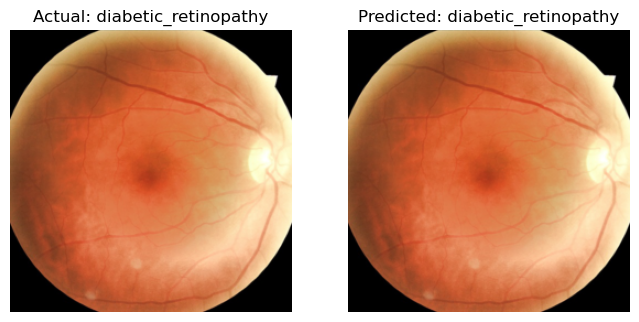

In [ ]:
def plot_actual_vs_predicted(model, test_loader, num_samples=5):
    model.eval()
    class_labels = list(train_data['labels'].unique())
    images, labels = next(iter(test_loader))
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    sample_indices = np.random.choice(range(len(images)), num_samples, replace=False)

    for i in sample_indices:
        actual_label = class_labels[labels[i].item()]
        predicted_label = class_labels[predicted[i].item()]
        plt.figure(figsize=(8, 4))
        # Actual Image
        plt.subplot(1, 2, 1)
        plt.imshow(images[i].cpu().permute(1, 2, 0).numpy())
        plt.title(f'Actual: {actual_label}')
        plt.axis('off')
        # Predicted Image
        plt.subplot(1, 2, 2)
        plt.imshow(images[i].cpu().permute(1, 2, 0).numpy())
        plt.title(f'Predicted: {predicted_label}')
        plt.axis('off')
        plt.show()

plot_actual_vs_predicted(model, test_loader)


# Unseen Image

In [ ]:
# for name, param in model.named_parameters():
#     if "fc" in name:  # Unfreeze the final classification layer
#         param.requires_grad = True
#     else:
#         param.requires_grad = False

In [ ]:

# # with open('/content/drive/My Drive/Colab Notebooks/EfficientNetB3_model(v1).pkl', 'rb') as f:
# #     state_dict = pickle.load(f)

# # Load the saved model
# model = models.efficientnet_b3(pretrained=True)
# model.fc = nn.Linear(model.fc.in_features, 1000)  # Adjust to match the original model's output units
# model.load_state_dict(torch.load('eye_disease_classification_model.pth'))
# # model.load_state_dict(state_dict)
# model.eval()

# # Create a new model with the correct final layer
# new_model = EfficientNetB3(num_classes=4)
# new_model.fc = nn.Linear(new_model.fc.in_features, 4)  # Adjust to match the desired output units

# # Copy the weights and biases from the loaded model to the new model
# new_model.fc.weight.data = model.fc.weight.data[0:2]  # Copy only the first 2 output units
# new_model.fc.bias.data = model.fc.bias.data[0:2]

In [ ]:
# Load the saved model
model = ResNet18(num_classes=4)
model.load_state_dict(torch.load('resnet18_model(v4).pth'))  # Load the original model weights
model.eval()

# Create a new model with the correct final layer
new_model = ResNet18(num_classes=4)  

# Load the state dict from the original model to the new model (without strict checking)
new_model.load_state_dict(model.state_dict(), strict=False)

# Manually adjust the weights and biases of the final fully connected layer
with torch.no_grad():
    new_model.base_model.fc.weight[:4] = model.base_model.fc.weight[:4]
    new_model.base_model.fc.bias[:4] = model.base_model.fc.bias[:4]

# Verify the parameters
for name, param in new_model.named_parameters():
    if param.requires_grad:
        print(f"{name}: requires_grad={param.requires_grad}")

base_model.fc.weight: requires_grad=True
base_model.fc.bias: requires_grad=True


In [ ]:
# import random

# root_dir = 'Test'
# subdirs = ['glaucoma', 'cataract', 'diabetic_retinopathy', 'normal']

# # Select a random subdirectory
# random_subdir = random.choice(subdirs)

# # Get a list of all image files in the chosen subdirectory
# image_files = os.listdir(os.path.join(root_dir, random_subdir))

# # Filter out non-image files if necessary (optional, depending on your directory structure)
# image_files = [file for file in image_files if file.endswith(('jpg', 'jpeg', 'png'))]

# # Select a random image file
# random_image_file = random.choice(image_files)

# # Construct the full path to the selected image
# image_path = os.path.join(root_dir, random_subdir, random_image_file)

# # image_path = 'Test\glaucoma\_49_249201.jpg'  # Replace with the path to your image
# image = Image.open(image_path)
# preprocess = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])
# input_tensor = preprocess(image)
# input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# print("Path of random file:", image_path)

In [ ]:
# # Display the image with the predicted class name
# image = np.array(image)
# plt.imshow(image)
# plt.axis('off')
# plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='Green')
# plt.show()

In [ ]:
model = ResNet18(4)
model.load_state_dict(torch.load('resnet18_model(v4).pth'))
model.eval()

# Define the transformation to apply to the input image
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

In [ ]:
import random

root_dir = 'Test'
subdirs = ['glaucoma', 'diabetic_retinopathy', 'normal', 'cataract']

# Select a random subdirectory
random_subdir = random.choice(subdirs)

# Get a list of all image files in the chosen subdirectory
image_files = os.listdir(os.path.join(root_dir, random_subdir))

# Filter out non-image files if necessary (optional, depending on your directory structure)
image_files = [file for file in image_files if file.endswith(('jpg', 'jpeg', 'png'))]

# Select a random image file
random_image_file = random.choice(image_files)

# Construct the full path to the selected image
image_path = os.path.join(root_dir, random_subdir, random_image_file)

# image_path = 'Test\glaucoma\_49_249201.jpg'  # Replace with the path to your image
image = Image.open(image_path)
print("Path of random file:", image_path)


input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Perform prediction
with torch.no_grad():
    output = model(input_image)

# Get the predicted class
_, predicted_class = torch.max(output, 1)

# Map the predicted class to the class name
class_names = ['glaucoma', 'diabetic_retinopathy', 'normal', 'cataract']  # Make sure these class names match your training data

if predicted_class.item() < len(class_names):
    predicted_class_name = class_names[predicted_class.item()]
    # print(len(class_names))
else:
    predicted_class_name = "Unknown"

print(f'The predicted class is: {predicted_class_name}')
print(predicted_class.item())

Path of random file: Test\glaucoma\094.jpg
The predicted class is: glaucoma
0


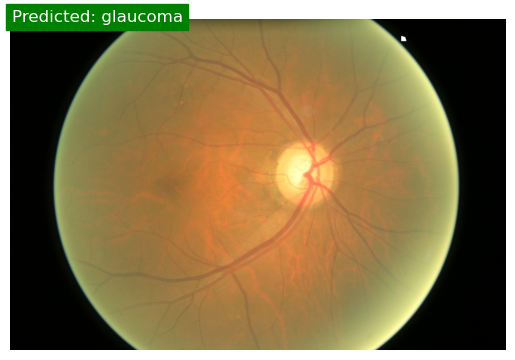

In [ ]:
# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='Green')
plt.show()

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(test_loader, predictions, target_names=people_names))

In [ ]:
import torch
from sklearn.metrics import classification_report

def get_predictions(model, dataloader, device):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    return y_true, y_pred

# Ensure the model is on the same device as the data
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Get true labels and predictions
y_true, y_pred = get_predictions(model, test_loader, device)

# Assuming label_map is a dictionary mapping from class index to class name
class_names = list(label_map.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

                      precision    recall  f1-score   support

            glaucoma       0.66      0.91      0.76        44
diabetic_retinopathy       1.00      0.78      0.88        45
              normal       0.61      0.69      0.65        45
            cataract       0.97      0.69      0.81        45

            accuracy                           0.77       179
           macro avg       0.81      0.77      0.77       179
        weighted avg       0.81      0.77      0.77       179



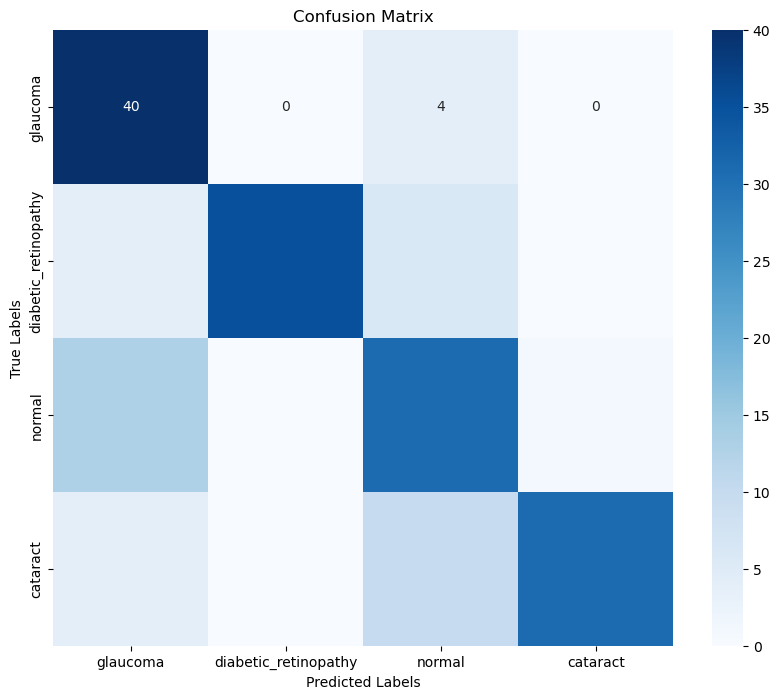

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()